<a href="https://colab.research.google.com/github/TrzeciakPiotr2300/Uczenie_Maszynowe_2025/blob/main/HW06_tree_methods_spliting_criteriors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Understanding Splitting Criteria in CART for Regression**
---------------------

In this assignment, you will explore three common formulations of the splitting criterion used in **CART (Classification and Regression Trees)** for **regression problems**:

1. **Local RSS Minimization**  
2. **RSS Gain Maximization**  
3. **Total RSS Minimization**

You will investigate whether any of these criteria are equivalent, and you will design an experiment to determine which criterion is actually employed in a standard implementation such as **scikit-learn’s DecisionTreeRegressor**.



## **The Problem**

Many treatments of CART for regression describe the split selection process in different ways. Below are three frequently cited formulations. Suppose we have a dataset with features $X$ and target $y$, and we seek to choose a feature $X_j$ and a threshold $t$ to split the data into two regions $R_1(X_j, t)$ and $R_2(X_j, t)$. Denote by $\bar{y}_{R_m}$ the mean of targets within region $R_m$.

1. **Local RSS Minimization**  
   We select the feature and threshold that minimize the **sum of squared errors** in the two resulting child nodes:
   $$
   (X_j^*, t^*) = \arg\min_{X_j, t} \sum_{m=1}^{2} \sum_{i : x_i \in R_m(X_j, t)} (y_i - \bar{y}_{R_m})^2.
   $$

2. **RSS Gain Maximization**  

   It is also a local method, looking only at a parent and two child nodes.

   We select the feature and threshold that maximize the **reduction** in RSS, computed by subtracting the RSS of the two child nodes from the RSS in the parent node:
   $$
   (X_j^*, t^*) = \arg\max_{X_j, t} \Bigl\{
   \underbrace{\sum_{i : x_i \in \text{Parent}} (y_i - \bar{y})^2}_{\text{Parent RSS}}
   \;-\;
   \underbrace{\sum_{m=1}^{2} \sum_{i : x_i \in R_m(X_j, t)} (y_i - \bar{y}_{R_m})^2}_{\text{Children RSS}}
   \Bigr\}.
   $$

3. **Total RSS Minimization**  
   For a dataset $\{(x_i, y_i)\}_{i=1}^N$ with features $X$ and target $y$, let $T$ be the current tree.

   For any split on feature $X_j$ at threshold $t$, define $T(X_j, t)$ as the new tree obtained by splitting one leaf of $T$ into two leaves $R_1(X_j, t)$ and $R_2(X_j, t)$.
   
   Let $\mathrm{Leaves}(T(X_j, t))$ be the set of all leaf indices in this new tree. For each leaf $m \in \mathrm{Leaves}(T(X_j, t))$, define:
   $$
   R_m = \{\, i \,\mid\, x_i \text{ ends in leaf } m\}.
   $$

   $R_m$ set collects all data indices $i$ whose feature vector $x_i$ is classified into the leaf node $m$ when passed through the tree $T(X_j,t)$. In other words, each leaf node $m$ in $T(X_j, t)$ corresponds to a unique path of splits, and any data point $x_i$ that follows that path is assigned to the leaf $m$; hence, it belongs to $R_m$.

   $R_m$ sets for all leafs $m \in \mathrm{Leaves}(T(X_j, t))$ define a partition of all indices.

   Then the objective of **minimizing total Residual Sum of Squares (total RSS)** is stated as:
   $$
   (X_j^*, t^*) = \arg\min_{(X_j, t)} \sum_{m \in \mathrm{Leaves}(T(X_j, t))}
   \sum_{i \in R_m} \Bigl(y_i - \overline{y}_{R_m}\Bigr)^2,
   $$
   where
   $$
   \overline{y}_{R_m} = \frac{1}{\lvert R_m \rvert}
   \sum_{i \in R_m} y_i
   $$
   is the mean response in leaf $m$.


## **Research Questions**

1. **Equivalence Analysis**  
   Determine whether the above formulations are equivalent or if they can yield different split choices. Specifically:
   - Are *local RSS minimization* and *RSS gain maximization* equivalent?
   - Does *total RSS minimization* coincide with either of these two, or is it distinct?
   
2. **Empirical Experiment**  
   Design and conduct a Python experiment to determine which of these formulations is implemented in `scikit-learn` in `DecisionTreeRegressor`. Present numerical results and plots to support your conclusion.


## **Tasks & Deliverables**

1. **Formulation Analysis**  
   - Compare *local RSS minimization*, *RSS gain maximization*, and *total RSS minimization*.
   - If you find that any pair of formulations is equivalent, provide a concise proof.  
   - If you find that they differ, construct a counterexample.

2. **Empirical Verification**  
   - Create a small artificial dataset and train a `DecisionTreeRegressor` from `scikit-learn`.
   - The dataset must be designed in a way that uniquely identifies the formulation used. Provide a short code snippet and a plot or table to support your conclusion.

3. **Report**  
   - Summarize your theoretical insights and empirical findings in a **Colab notebook**.
   - Include the relevant proofs, code, discussion, and conclusions.
   - Place the notebook in your **GitHub repository** for this course, add a link to it in your README.md and add an **“Open in Colab”** badge in the notebook so it can be launched directly.



---------------------
# **Homework Answers: Understanding Splitting Criteria in CART for Regression**
---------------------

Recall he have been asked to comment on 3 types of **regression problems**:

1. **Local RSS Minimization**  
2. **RSS Gain Maximization**  
3. **Total RSS Minimization**

If we look closely on equations for first two criteriors:

1. **Local RSS Minimization**
   $$
   (X_j^*, t^*) = \arg\min_{X_j, t} \sum_{m=1}^{2} \sum_{i : x_i \in R_m(X_j, t)} (y_i - \bar{y}_{R_m})^2
   $$

2. **RSS Gain Maximization**  
   $$
   (X_j^*, t^*) = \arg\max_{X_j, t} \Bigl\{
   \underbrace{\sum_{i : x_i \in \text{Parent}} (y_i - \bar{y})^2}_{\text{Parent RSS}}
   \;-\;
   \underbrace{\sum_{m=1}^{2} \sum_{i : x_i \in R_m(X_j, t)} (y_i - \bar{y}_{R_m})^2}_{\text{Children RSS}}
   \Bigr\},
   $$

we can observe they are equivalent. Indeed they are, and the reason is that the first equation satisfys
   $$
   (X_j^*, t^*) = \arg\min_{X_j, t} \sum_{m=1}^{2} \sum_{i : x_i \in R_m(X_j, t)} (y_i - \bar{y}_{R_m})^2 = \arg\max_{X_j, t} \Bigl\{-\sum_{m=1}^{2} \sum_{i : x_i \in R_m(X_j, t)} (y_i - \bar{y}_{R_m})^2\Bigr\}.
   $$
Plus, $\text{"Parent RSS"}$ is independent of $(X_j^*, t^*)$, therefore we get
   $$
   (X_j^*, t^*) = \arg\max_{X_j, t} \Bigl\{
   {\sum_{i : x_i \in \text{Parent}} (y_i - \bar{y})^2} -
   {\sum_{m=1}^{2} \sum_{i : x_i \in R_m(X_j, t)} (y_i - \bar{y}_{R_m})^2}
   \Bigr\},
   $$
becouse first component doesn't change the maximal argument.

------------------------------------
# **Result no 1**: Both local criteriors (1 and 2) are equivalent.
------------------------------------

If we closely analyze the third splitting criterion, we’ll notice that it performs global splitting—it considers all possible thresholds across all nodes to find the globally best splits. This can potentially lead to a better-performing tree.

Unfortunately, this approach is computationally expensive, especially when we have hundreds of features and a large number of data points. Growing a single tree this way could result in a worst-case time complexity even greater than O(n ^ (2 ^ D - 1)), where n is the number of data points and D is the maximum tree depth. In practice, the actual complexity may (and almost surely will) be even worse due to additional factors like computing the RSS, managing memory for storing leaf nodes, using more than just one feature, etc. This means the time complexity grows more than exponentially with the size of the training set.

However, we can build such a tree on a small dataset with a maximum depth of 2 to illustrate how it might differ from the default approach. Specifically, we can use this to highlight the default splitting strategy used in scikit-learn.

Let's look at a simple example to answer this secondary question:

# **Secondary Question:**
###*Presenting numerical experiment to find out which splitting criterior is used in DecisionTreeRegressor()*


----------------------------------------------------------------
# 1. Importing *libraries*
----------------------------------------------------------------

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')


---------------------
# 2. Creating dataset
---------------------

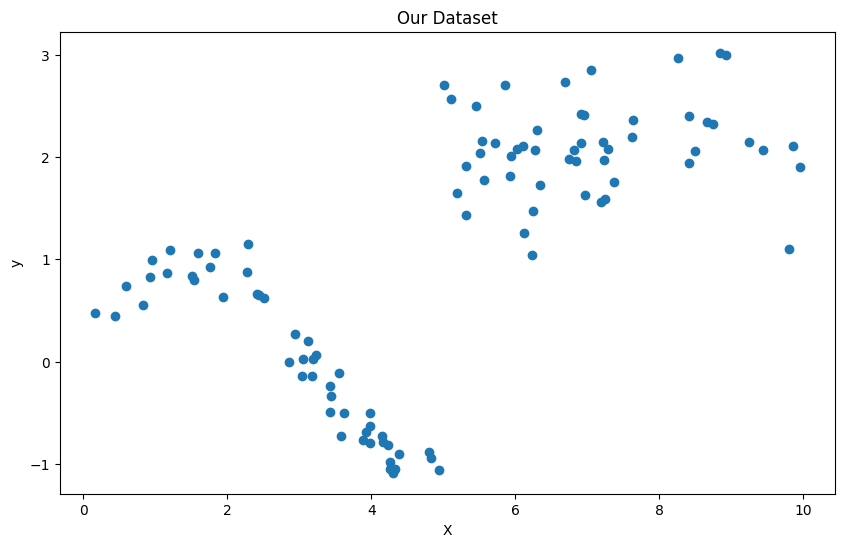

In [110]:
np.random.seed(123)

X = np.sort(np.random.rand(100) * 10).reshape(-1, 1)
X_flat = X.ravel()

y = np.zeros_like(X_flat)

for i, x in enumerate(X_flat):
    if x < 5:
        y[i] = np.sin(x) + np.random.normal(0, 0.15)
    else:
        y[i] = np.log(x + 1) + np.random.normal(0, 0.5)

plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Our Dataset')
plt.show()


----------------------------------------------------------------
# 3. Implementation of functions for calculation of first 2 criteriors
----------------------------------------------------------------

In [111]:
def node_rss(y):
    mu = np.mean(y)
    rss = np.sum((y - mu) ** 2)
    return rss

def generate_splits(X):
  lst = []
  for i in range(len(X)-1):
    lst.append((X[i]+X[i+1])/2)
  return lst

def local_rss(X, y, potential_splits):
    """
    Returns the best local splitting point (threshold),
    corresponding RSS, and the list of RSS values for each threshold.
    """
    X = np.ravel(X.copy())
    rss_path = []
    for thresh in potential_splits:
        X_left = X < thresh
        X_right = X >= thresh
        y_left = y[X_left]
        y_right = y[X_right]
        rss_left = node_rss(y_left)
        rss_right = node_rss(y_right)
        rss_sum = rss_left + rss_right
        rss_path.append(rss_sum)

    rss_min = min(rss_path)
    min_index = rss_path.index(rss_min)

    return potential_splits[min_index], rss_min, rss_path


def rss_gain(X, y, potential_splits):
    """
    Returns the best local splitting point (threshold) that maximizes RSS gain,
    and the list of RSS gains for each threshold.
    """
    X = np.ravel(X.copy())
    gain_path = []
    rss_parent = node_rss(y)

    for thresh in potential_splits:
        X_left = X < thresh
        X_right = X >= thresh
        y_left = y[X_left]
        y_right = y[X_right]
        rss_left = node_rss(y_left)
        rss_right = node_rss(y_right)
        rss_sum = rss_left + rss_right
        gain = rss_parent - rss_sum
        gain_path.append(gain)

    rss_max = max(gain_path)
    max_index = gain_path.index(rss_max)

    return potential_splits[max_index], rss_max, gain_path


----------------------------------------------------------------
# 4. Implementation of function for calculation of 3rd criterior
----------------------------------------------------------------

In [112]:
def global_rss(X, y, potential_splits):
    """
    Returns the best global splitting point and corresponding RSS.
    Assumes we build a tree of max depth = 2 (i.e., 3 nodes after 2 splits).
    """
    X = np.ravel(X.copy())
    rss_path = []
    splits_path = []

    for thresh in potential_splits:
        # Apply split
        left_mask = X < thresh
        right_mask = X >= thresh
        y_left = y[left_mask]
        y_right = y[right_mask]
        X_left_vals = X[left_mask]
        X_right_vals = X[right_mask]

        # Perform local splits on both sides
        split_left, rss_left, _ = local_rss(X_left_vals, y_left, potential_splits)
        split_right, rss_right, _ = local_rss(X_right_vals, y_right, potential_splits)
        rss_sum = rss_left + rss_right

        rss_path.append(rss_sum)
        splits_path.append((split_left, split_right))

    rss_min = min(rss_path)
    min_index = rss_path.index(rss_min)

    return splits_path[min_index], rss_min, rss_path, potential_splits[min_index]


-----------------------------------
# 5. Now generate tree and all necesarry data
-----------------------------------

In [113]:
potential_splits = generate_splits(X)

tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X, y)
tree_first_split = tree.tree_.threshold[0]

local_split_fit, _, _ = local_rss(X, y, potential_splits)
local_gain_fit, _, _ = rss_gain(X, y, potential_splits)
global_split_fit, _, _, root_split = global_rss(X, y, potential_splits)

X_mask = X < local_split_fit
X_left = X[X_mask]
X_right = X[~X_mask]
y_left = y[X_mask.ravel()]
y_right = y[~X_mask.ravel()]

local_new_left, _, _ = local_rss(X_left, y_left, generate_splits(X_left))
local_new_right, _, _ = local_rss(X_right, y_right, generate_splits(X_right))

gain_new_left, _, _ = rss_gain(X_left, y_left, generate_splits(X_left))
gain_new_right, _, _ = rss_gain(X_right, y_right, generate_splits(X_right))

## Prepare dataframe to handle plots better
df = pd.DataFrame({
    'local': [local_split_fit[0], local_new_left, local_new_right],
    'rss_gain': [local_gain_fit[0], gain_new_left, gain_new_right],
    'global': [root_split[0], global_split_fit[0][0], global_split_fit[1][0]],
    'node': ['First', 'Second', 'Third']
})

df[df.select_dtypes(include='number').columns] = df[df.select_dtypes(include='number').columns].round(2)

print(df.head())

   local  rss_gain  global    node
0   4.98      4.98    3.57   First
1   3.33      3.33    2.68  Second
2   7.50      7.50    4.98   Third


----------------------
# 6. Plots
---------------------


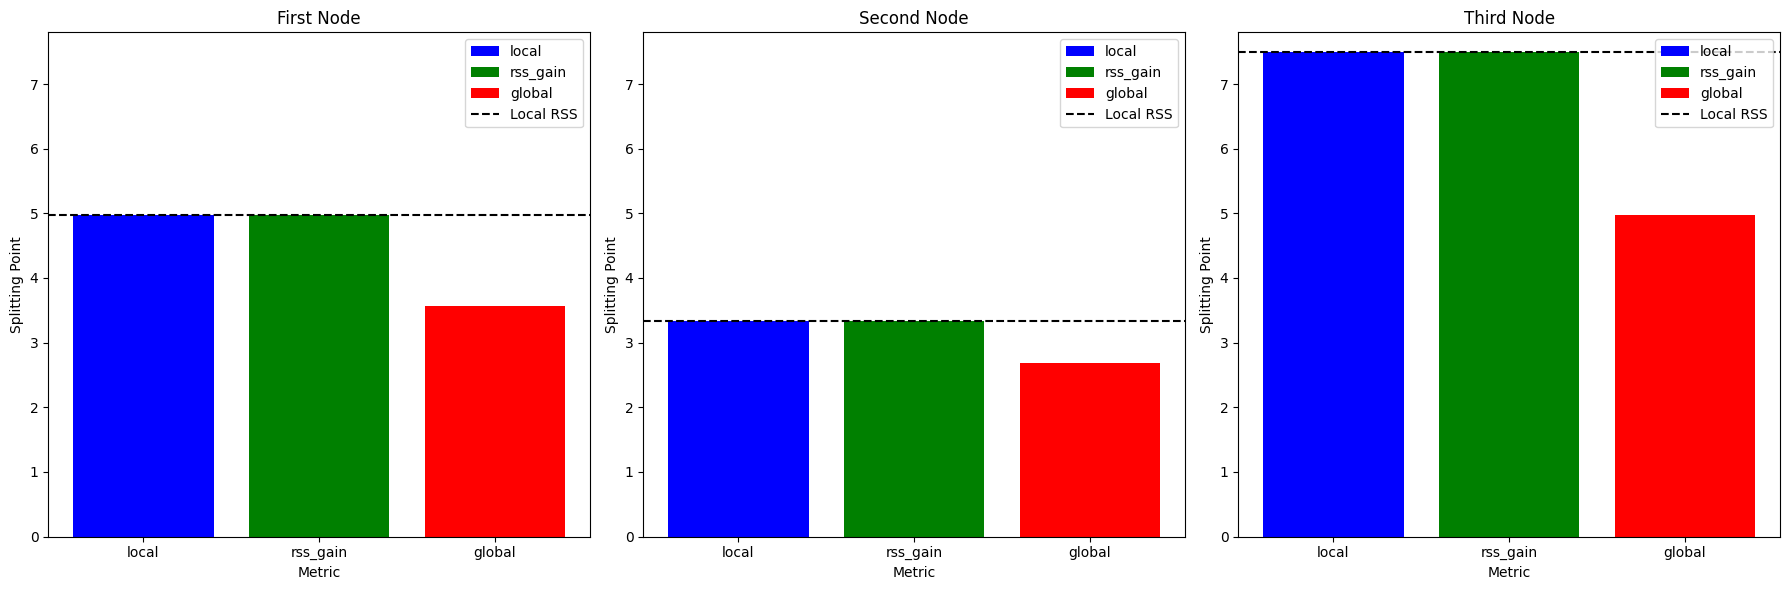

In [114]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

nodes = ['First', 'Second', 'Third']
columns = ['local', 'rss_gain', 'global']

for i, node in enumerate(nodes):
    data_row = df[df['node'] == node][columns].values.flatten()

    axes[i].bar(columns, data_row, color=['blue', 'green', 'red'], label=columns)
    axes[i].set_title(f'{node} Node')
    axes[i].set_xlabel('Metric')
    axes[i].set_ylabel('Splitting Point')
    axes[i].set_ylim(0, 7.8)
    axes[i].axhline(y=df['local'].iloc[i], color='black', linestyle='--', label='Local RSS')
    axes[i].legend()

plt.tight_layout()

plt.show()


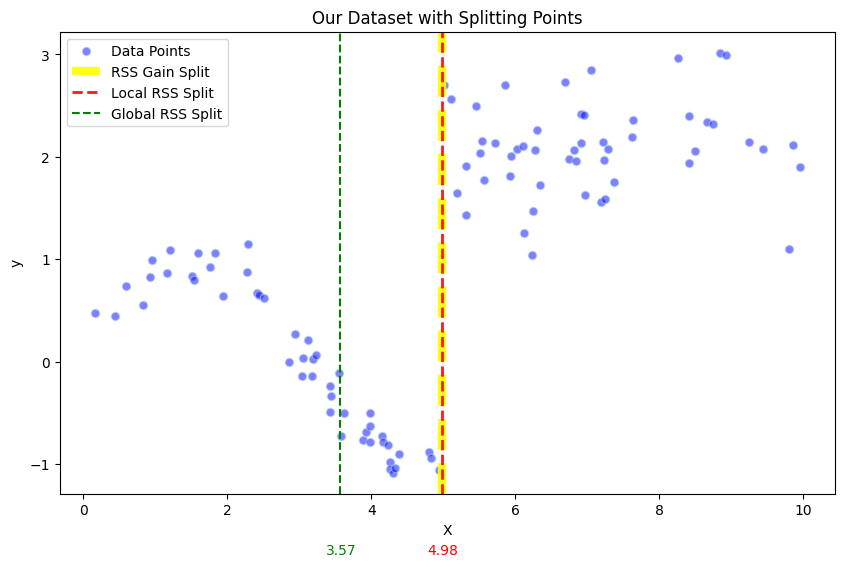

In [115]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points', alpha=0.5, edgecolors='lightblue')

# Gain
plt.axvline(df['rss_gain'].iloc[0], color='yellow', linestyle='--', label='RSS Gain Split', linewidth=6, alpha=0.9)
plt.text(df['rss_gain'].iloc[0] - 0.2, -1.88, s=f"{df['rss_gain'].iloc[0]}", color = 'red')

# Local
plt.axvline(df['local'].iloc[0], color='red', linestyle='--', label='Local RSS Split', linewidth=2, alpha=0.9)
plt.text(df['global'].iloc[0] - 0.2, -1.88, s=f"{df['global'].iloc[0]}", color = 'green')

plt.axvline(df['global'].iloc[0], color='green', linestyle='--', label='Global RSS Split')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Our Dataset with Splitting Points')

plt.legend()
plt.show()

# **SUMMARY**
As we can see, global approach gave us compleatly different result in the node. Interesting part is that it splited 3rd node at exactly the same point as local methods did in the node. Note: It is because data has higher variance when X is lower and stabilizes as X gets higher. However, second split is compleatly different.

# Final result: Methods 1 and 2 are 100% equivalent, 3rd is the same only if tree is of depth 1, and is NOT equivalent in other cases (tree of depth >= 2).